In [15]:
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use('seaborn')

## Linear Regression

### Normal Equation

In [16]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100, 1)

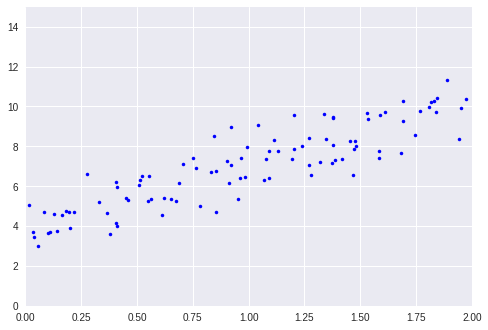

In [17]:
plt.plot(X, y, "b.");
plt.axis([0,2,0,15]);

In [18]:
X.T.shape

(1, 100)

In [19]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [20]:
theta_best

array([[3.90138788],
       [3.15587221]])

In [21]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.90138788],
       [10.2131323 ]])

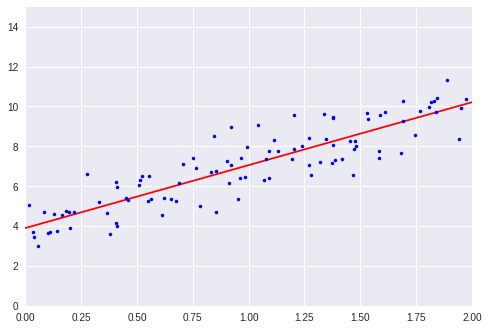

In [22]:
plt.plot(X_new, y_predict, "r-");
plt.plot(X,y, "b.")
plt.axis([0,2,0,15]);

With Scikit-Learn:

In [23]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.90138788]), array([[3.15587221]]))

In [24]:
lin_reg.predict(X_new)

array([[ 3.90138788],
       [10.2131323 ]])

## Gradient Descent

### Batch Gradient Descent

In [25]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random init.

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [26]:
theta

array([[3.90138788],
       [3.15587221]])

### Stochastic Gradient Descent

In [39]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [49]:
theta

array([[3.91563789],
       [3.1649739 ]])

In [56]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None)

In [57]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.91591572]), array([3.16564813]))

## Polynomial Regression

In [62]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

(-3.0, 3.0, 0.0, 10.0)

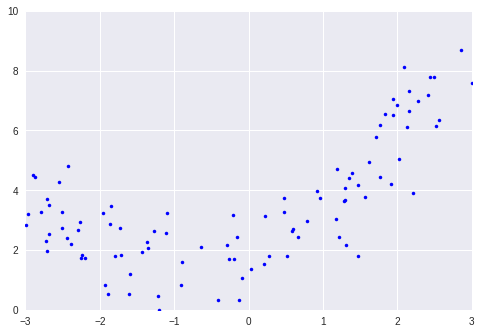

In [64]:
plt.plot(X, y, 'b.')
plt.axis([-3, 3, 0, 10])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures((degree=2, include_bias=False))
X_poly = poly_features.fit_transform()